In [1]:
# ignore this
%load_ext music21.ipython21

# User's Guide, Chapter 23: Advanced Corpus and Metadata Searching

In [2]:
from music21 import *

## Creating multiple corpus repositories via local corpora

In addition to the default local corpus, music21 allows users to create
and save as many named local corpora as they like, which will persist from
session to session.

Let's create a new *local* corpus, give it a directory to find music files in,
and then save it:


In [3]:
aNewLocalCorpus = corpus.corpora.LocalCorpus('A new corpus')
aNewLocalCorpus.existsInSettings

False

In [4]:
aNewLocalCorpus.addPath('~/Desktop')
#_DOCS_SHOW aNewLocalCorpus.directoryPaths
print("('/Users/josiah/Desktop',)") #_DOCS_HIDE

('/Users/josiah/Desktop',)


In [5]:
aNewLocalCorpus.save()
aNewLocalCorpus.existsInSettings

True

We can see that our new *local* corpus is saved by checking for the names of
all saved *local* corpora using the corpus.manager list:

In [6]:
#_DOCS_SHOW corpus.manager.listLocalCorporaNames()
print("[None, 'trecento', 'A new corpus', 'bach', 'fake']") #_DOCS_HIDE

[None, 'trecento', 'A new corpus', 'bach', 'fake']


Finally, we can delete the *local* corpus we previously created like this:

In [7]:
aNewLocalCorpus.delete()
aNewLocalCorpus.existsInSettings

False

## Inspecting metadata bundle search results

Let's take a closer look at some search results:

In [8]:
bachBundle = corpus.corpora.CoreCorpus().search('bach', 'composer')
bachBundle

<music21.metadata.bundles.MetadataBundle {22 entries}>

In [9]:
bachBundle[0]

<music21.metadata.bundles.MetadataEntry: bach_choraleAnalyses_riemenschneider001_rntxt>

In [10]:
bachBundle[0].sourcePath

'bach/choraleAnalyses/riemenschneider001.rntxt'

In [11]:
bachBundle[0].metadataPayload

In [12]:
mdpl = bachBundle[0].metadataPayload
mdpl.noteCount

60

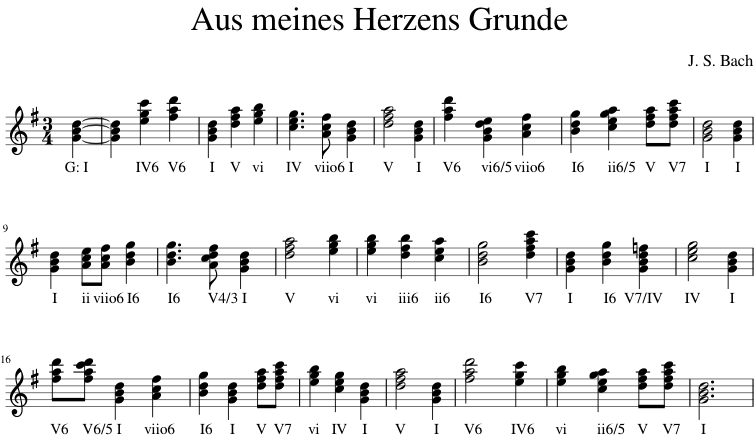

In [13]:
bachAnalysis0 = bachBundle[0].parse()
bachAnalysis0.show()

## Manipulating multiple metadata bundles

Another useful feature of `music21`'s metadata bundles is that they can be
operated on as though they were sets, allowing you to union, intersect and
difference multiple metadata bundles, thereby creating more complex search
results:

In [14]:
corelliBundle = corpus.search('corelli', field='composer')
corelliBundle

<music21.metadata.bundles.MetadataBundle {1 entry}>

In [15]:
bachBundle.union(corelliBundle)

<music21.metadata.bundles.MetadataBundle {23 entries}>

Consult the API for class:`~music21.metadata.bundles.MetadataBundle` for a more
in depth look at how this works.

## Getting a metadata bundle

In music21, metadata is information *about* a score, such as its composer,
title, initial key signature or ambitus. A metadata *bundle* is a collection of
metadata pulled from an arbitrarily large group of different scores. Users can
search through metadata bundles to find scores with certain qualities, such as
all scores in a given corpus with a time signature of ``6/8``, or all scores
composed by Monteverdi.

There are a number of different ways to acquire a metadata bundle.  The easiest way
to get the metadataBundle for the core corpus is simply to download music21: we
include a pre-made metadataBundle (in ``corpus/metadataCache/core.json``) so
that this step is unnecessary for the core corpus unless you're contributing to
the project.  But you may want to create metadata bundles for your own local corpora.
Access the ``metadataBundle`` attribute of any ``Corpus`` instance to get its
corresponding metadata bundle:

In [16]:
coreCorpus = corpus.corpora.CoreCorpus()
coreCorpus.metadataBundle

<music21.metadata.bundles.MetadataBundle 'core': {14486 entries}>

Music21 also provides a handful of convenience methods for getting metadata
bundles associated with the *virtual*, *local* or *core* corpora:

In [17]:
coreBundle = corpus.corpora.CoreCorpus().metadataBundle
localBundle = corpus.corpora.LocalCorpus().metadataBundle
otherLocalBundle = corpus.corpora.LocalCorpus('blah').metadataBundle
virtualBundle = corpus.corpora.VirtualCorpus().metadataBundle

But really advanced users can also make metadata bundles manually, by passing in the name of the
corpus you want the bundle to refer to, or, equivalently, an actual ``Corpus`` instance
itself:

In [18]:
coreBundle = metadata.bundles.MetadataBundle('core')
coreBundle = metadata.bundles.MetadataBundle(corpus.corpora.CoreCorpus())

However, you'll need to read the bundle's saved data from disk before you can
do anything useful with the bundle. Bundles don't read their associated JSON
files automatically when they're manually instantiated.

In [19]:
coreBundle

<music21.metadata.bundles.MetadataBundle 'core': {0 entries}>

In [20]:
coreBundle.read()

<music21.metadata.bundles.MetadataBundle 'core': {14486 entries}>

## Creating persistent metadata bundles

Metadata bundles can take a long time to create.  So it'd be nice if they could be written to and read from disk.  Unfortunately we never got around to...nah, just kidding.  Of course you can.  Just call `.write()` on one:

In [21]:
coreBundle = metadata.bundles.MetadataBundle('core')
coreBundle.read()

<music21.metadata.bundles.MetadataBundle 'core': {14486 entries}>

In [22]:
#_DOCS_SHOW coreBundle.write()

They can also be completely rebuilt, as you will want to do for local
corpora. To add information to a bundle, use the ``addFromPaths()`` method:

In [23]:
newBundle = metadata.bundles.MetadataBundle()
paths = corpus.corpora.CoreCorpus().getBachChorales()
#_DOCS_SHOW failedPaths = newBundle.addFromPaths(paths)
failedPaths = [] #_DOCS_HIDE
failedPaths

[]

then call ``.write()`` to save to disk

In [24]:
#_DOCS_SHOW newBundle
print("<music21.metadata.bundles.MetadataBundle {402 entries}>") # did not actually run addFromPaths... #_DOCS_HIDE

<music21.metadata.bundles.MetadataBundle {402 entries}>


You can delete, rebuild and save a metadata bundle in one go with the
``rebuild()`` method:

In [25]:
virtualBundle = corpus.corpora.VirtualCorpus().metadataBundle
#_DOCS_SHOW virtualBundle.rebuild()

The process of rebuilding will store the file as it goes (for safety) so at the end there is 
no need to call ``.write()``.

To delete a metadata bundle's cached-to-disk JSON file, use the ``delete()``
method:

In [26]:
#_DOCS_SHOW virtualBundle.delete()

Deleting a metadata bundle's JSON file won't empty the in-memory contents of
that bundle. For that, use ``clear()``:

In [27]:
virtualBundle.clear()